In [99]:
import os
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline

def plot_perf(file_name, varx):
    if varx == 'min':
        varx = 'amin'
    if varx == 'max':
        varx = 'amax'

    if varx not in ('amin', 'amax', 'mean'):
        return "Please select from ('min', 'max', 'mean')"
    
#     df1 = pd.read_csv(file_name, header=-1, skiprows=5)
#     df1 = pd.read_csv(file_name, header=-1, skiprows=4)
    df1 = pd.read_csv(file_name, header=-1, skiprows=12)
    ttl_var = file_name.split('_')[0].replace('./','')
    df1.columns = ['Epoch','Query','Epsilon', 'Batch','Ys','Recall','Precision','F1']
    df1['Recall'] = df1['Recall'].str.replace("Recall = ",'').str.replace('\{','').astype(float)
    df1['Precision'] = df1['Precision'].str.replace("Precision = ",'').str.replace('\}','').astype(float)
    df1['F1'] = df1['F1'].str.replace("F1 = ",'').str.replace('\}\t','').astype(float)
    df1['Epoch'] = df1['Epoch'].str.replace("Epoch", '').astype(int)
    ms = []
    print(df1.head())
    for metric in ('Precision', 'Recall', 'F1'):    
        df1ss = df1 #[df1['Query']==' query = aurora']
        grouped = df1ss[[metric,'Epoch']].groupby(['Epoch'])
        df2 = grouped.agg({np.min, np.mean, np.max })
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename_axis(None, axis=1)
        df2 = df2.reset_index()
        ms.append( (metric, df2[varx] ))
        print('Average max performance of %s is %.6f', (metric, df2['mean'].max()))

    plt.figure(figsize=(16, 8))
    plt.title(ttl_var + ' average precision, recall, and f1 across epochs')
    plt.plot(df2['Epoch'], ms[0][1], label=ms[0][0], c='purple')
    plt.plot(df2['Epoch'], ms[1][1], label=ms[1][0], c='blue')
    plt.plot(df2['Epoch'], ms[2][1], label=ms[2][0], c='red')
#     plt.ylim(0,1)
    plt.xlabel('Epochs')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

   Epoch              Query           Epsilon           Batch  \
0      0   query = pakistan   epsilon = 0.920   minibatch 4/5   
1      0   query = pakistan   epsilon = 0.920   minibatch 5/5   
2      1     query = aurora   epsilon = 0.840   minibatch 1/5   
3      1     query = aurora   epsilon = 0.840   minibatch 2/5   
4      1     query = aurora   epsilon = 0.840   minibatch 3/5   

                         Ys    Recall  Precision        F1  
0    sum(y)/len(y) = 62/200  0.107330   0.020865  0.034938  
1    sum(y)/len(y) = 48/200  0.091623   0.017812  0.029825  
2    sum(y)/len(y) = 49/199  0.081690   0.087834  0.084651  
3    sum(y)/len(y) = 63/200  0.089202   0.095477  0.092233  
4   sum(y)/len(y) = 200/200  0.181221   0.193872  0.187333  
('Average max performance of %s is %.6f', ('Precision', 0.077513800000000008))
('Average max performance of %s is %.6f', ('Recall', 0.10645869999999999))
('Average max performance of %s is %.6f', ('F1', 0.080606800000000006))


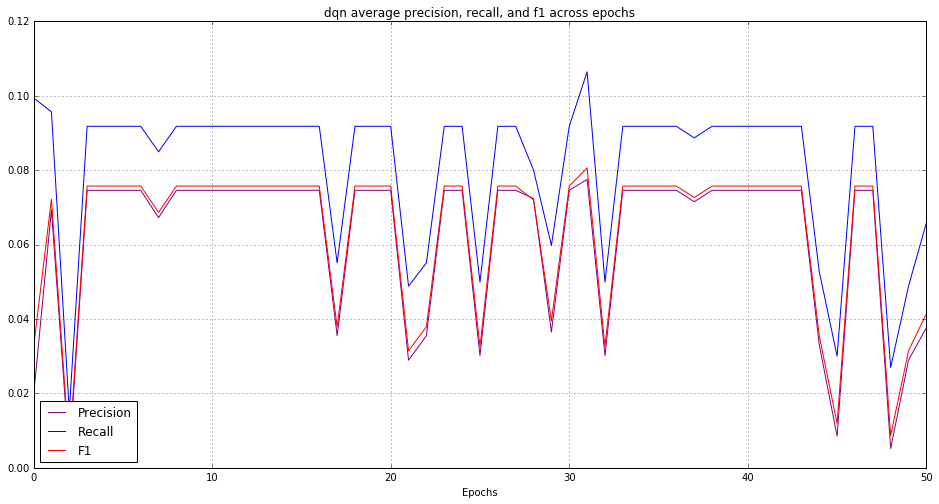

In [100]:
plot_perf('./dqn_full_bow_model_perf.txt', 'mean')

   Epoch              Query           Epsilon           Batch  \
0      0   query = pakistan   epsilon = 0.920   minibatch 4/5   
1      0   query = pakistan   epsilon = 0.920   minibatch 5/5   
2      1     query = aurora   epsilon = 0.840   minibatch 1/5   
3      1     query = aurora   epsilon = 0.840   minibatch 2/5   
4      1     query = aurora   epsilon = 0.840   minibatch 3/5   

                        Ys    Recall  Precision        F1  
0   sum(y)/len(y) = 47/200  0.000000   0.000000  0.000000  
1   sum(y)/len(y) = 47/200  0.000000   0.000000  0.000000  
2   sum(y)/len(y) = 48/199  0.010798   0.011735  0.011247  
3   sum(y)/len(y) = 51/200  0.032864   0.035533  0.034146  
4   sum(y)/len(y) = 47/200  0.085915   0.092893  0.089268  
('Average max performance of %s is %.6f', ('Precision', 0.076707600000000001))
('Average max performance of %s is %.6f', ('Recall', 0.10253209999999999))
('Average max performance of %s is %.6f', ('F1', 0.079268400000000003))


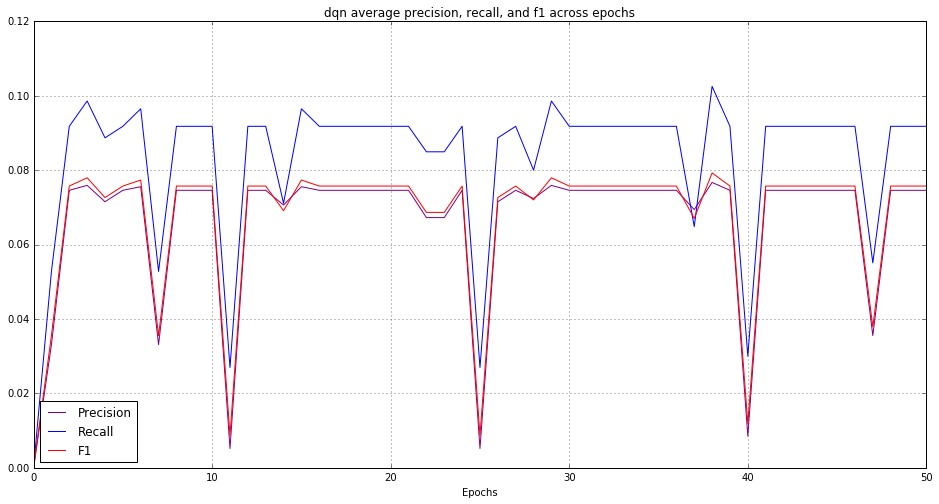

In [101]:
plot_perf('./dqn_full_lstm_model_perf.txt', 'mean')

('Average max performance of %s is %.6f', ('Precision', 0.040273880000000005))
('Average max performance of %s is %.6f', ('Recall', 0.094422680000000023))
('Average max performance of %s is %.6f', ('F1', 0.056463840000000015))


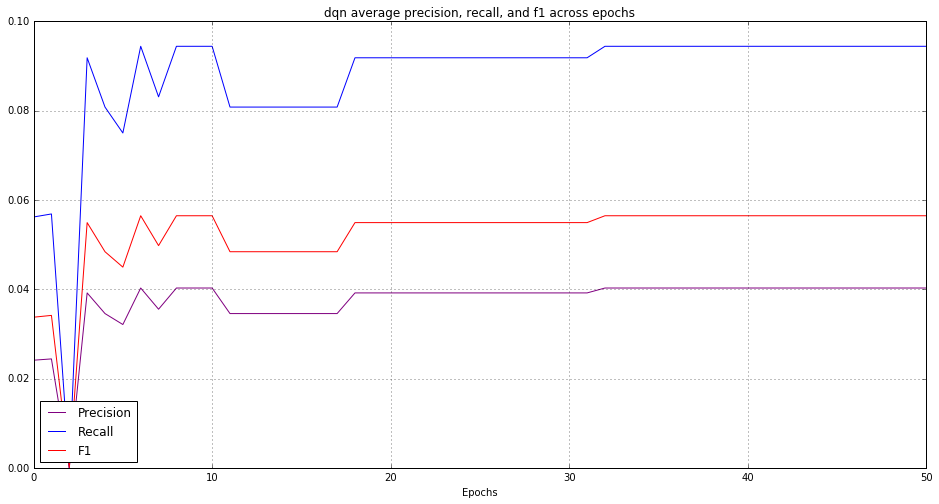

In [56]:
plot_perf('./dqn_lstm_model_perf.txt', 'mean')

('Average max performance of %s is %.6f', ('Precision', 0.040273880000000005))
('Average max performance of %s is %.6f', ('Recall', 0.094422680000000023))
('Average max performance of %s is %.6f', ('F1', 0.056463840000000015))


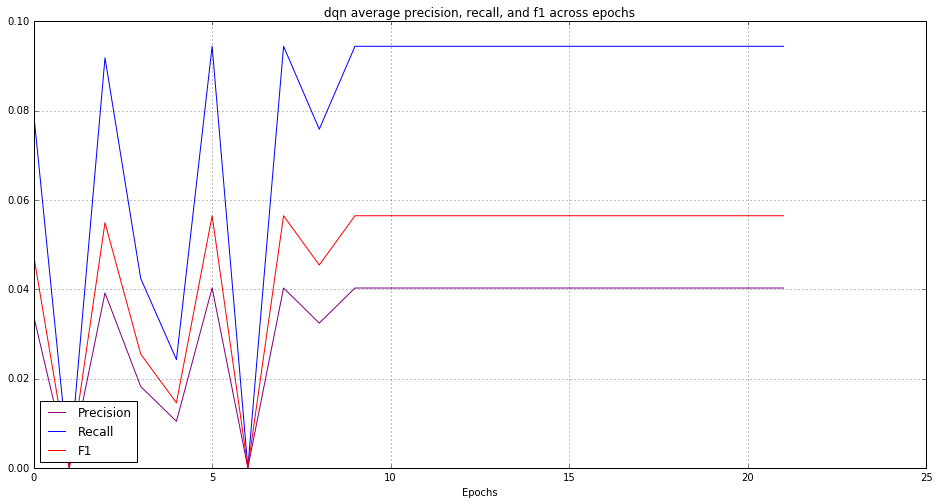

In [84]:
plot_perf('./dqn_bow_model_perf.txt', 'mean')